## Objectives:
### 1: What is the trend of CO2 globally?
### 2: To find if the production of rice is increasing as the CO2 is increasing. Objective function1: Maximize rice production(rp), maximize CO2(co2):rp=x*co2+y
### 3: To find if the production of wheat is increasing as the CO2 is increasing.Objective function1: Maximize wheat production(wp), maximize CO2(co2):wp=x*co2+y




## Crop Data

#### We have data for wheat , rice , maize and soyabean


In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# temp data by country
mydrive = "/content/drive/My Drive/ML-Summer-2023/The Martians/Data/GlobalLandTemperaturesByCountry.csv"
profdrive="/content/drive/MyDrive/ML-Summer-2023/The Martians/Data"
file_name1="GlobalLandTemperaturesByCountry.csv"
file_name2="rice-production.csv"
file_name3="wheat-production.csv"
file_name5="maize-production.csv"
file_name6="soybean-production.csv"
file_name4="FT2021_fossil_CO2_booklet_2022.xlsx"
file_name7="crop_production.csv"
file_name8="country_codes.csv"
import os
os.chdir(profdrive)

In [ ]:
# new rice crop data
data_rice= pd.read_csv(file_name2)
# new wheat crop data
data_wheat= pd.read_csv(file_name3)
# new maize crop data
data_maize = pd.read_csv(file_name5)
# new soybean crop data
data_soybean = pd.read_csv(file_name6)

In [ ]:
data_crops_country= pd.read_csv(file_name3) # different dataset

In [ ]:
# valid country codes
data_country_code = pd.read_csv(file_name8)

In [ ]:
data_temp_country = pd.read_csv(file_name1) # till Aug 2013

In [ ]:
data_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


## Q1: What is the trend of CO2 globally?

In [ ]:
data_co2_country = pd.read_excel(file_name4,sheet_name="fossil_CO2_totals_by_country")

In [ ]:
data_co2_country

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CO2,ABW,Aruba,0.081876,0.081889,0.095415,0.099630,0.089089,0.105139,0.096041,...,1.618441,1.588689,1.615728,1.607879,1.578644,1.315458,1.347594,1.387156,1.144333,1.274134
1,CO2,AFG,Afghanistan,1.739541,1.737823,1.715749,1.742813,2.198551,2.037627,1.899895,...,10.238064,8.484183,8.016290,8.361849,7.635914,8.145255,9.106997,8.082724,8.183718,8.347669
2,CO2,AGO,Angola,8.952570,8.538308,10.388519,11.372301,11.833761,10.930423,7.317385,...,24.186843,27.822325,30.407844,32.594130,30.691660,26.129882,24.048619,25.325994,23.055844,24.450057
3,CO2,AIA,Anguilla,0.002168,0.002168,0.002264,0.002109,0.002350,0.002584,0.002434,...,0.026023,0.027941,0.027896,0.028005,0.028340,0.029062,0.028223,0.027580,0.022779,0.025409
4,CO2,AIR,International Aviation,169.300997,169.300997,179.147487,186.892096,179.793331,173.866020,174.273791,...,472.721119,480.909126,496.627697,524.654035,548.207777,582.230490,609.630469,617.763229,338.144083,390.166250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,CO2,ZMB,Zambia,3.670158,3.827327,4.235602,4.549516,4.584571,4.756705,4.757159,...,4.353041,4.560796,4.995499,5.314527,5.783061,7.265927,8.268376,7.084711,6.618359,7.010965
209,CO2,ZWE,Zimbabwe,9.669320,9.616592,9.164476,10.612888,10.303574,9.088979,10.059936,...,12.458577,12.756765,12.647276,12.875895,11.312592,10.540316,12.730372,12.088218,11.443394,12.293227
210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,CO2,EU27,EU27,3542.825533,3553.664800,3697.504907,3887.115359,3833.301897,3744.235427,3996.612030,...,3262.094670,3182.700438,3039.771438,3097.973498,3106.408744,3130.214112,3065.688131,2922.049472,2605.119130,2774.926525


In [ ]:
years=(data_co2_country.columns).to_list()[3:]

In [ ]:
global_co2=list(np.array(data_co2_country[data_co2_country['EDGAR Country Code']=="GLOBAL TOTAL"])[0])[3:]

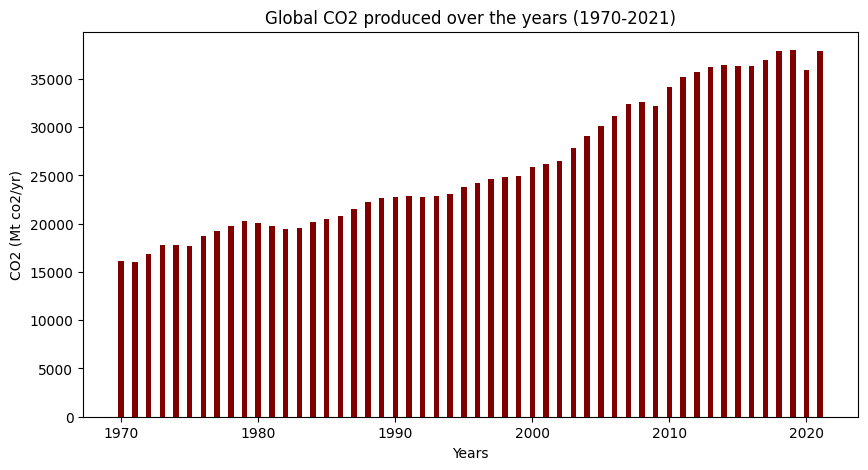

In [ ]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(years, global_co2, color ='maroon',
        width = 0.4)

plt.xlabel("Years")
plt.ylabel("CO2 (Mt co2/yr)")
plt.title("Global CO2 produced over the years (1970-2021)")
plt.show()

## A1: From the above graph we can see that the trend of global CO2 is upward with some seasoning. After every 5 years it seems to decrease a little but in a decade it goes upward.
From 1970 to 2021, the global CO2 has increase more than twice what it was in 1970.

### Data Cleaning
- remove data without Code
- keep data with valid country code


In [ ]:
# remove empty and na code data , keep records with valid countty code
def removeDataWithoutCode(df,code):

  df_ = df[df[code].notna()]
  df_=df_[~(df_[code]=='')]

  df_ = df_[df_[code].isin(data_country_code['Code'])]
  return df_

# data_rice = removeDataWithoutCode(data_rice)
# data_soybean = removeDataWithoutCode(data_soybean)
# data_wheat = removeDataWithoutCode(data_wheat)
# data_maize = removeDataWithoutCode(data_maize)


In [ ]:
data_co2=removeDataWithoutCode(data_co2_country,"EDGAR Country Code")

In [ ]:
data_co2=data_co2.rename(columns={'EDGAR Country Code': 'Code'})

In [ ]:
data_co2["change_co2"]=((data_co2[2021]-data_co2[1970])/data_co2[1970])*100

In [ ]:
data_co2

,Substance,Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,change_co2
0,CO2,ABW,Aruba,0.081876,0.081889,0.095415,0.099630,0.089089,0.105139,0.096041,...,1.588689,1.615728,1.607879,1.578644,1.315458,1.347594,1.387156,1.144333,1.274134,1456.174279
1,CO2,AFG,Afghanistan,1.739541,1.737823,1.715749,1.742813,2.198551,2.037627,1.899895,...,8.484183,8.016290,8.361849,7.635914,8.145255,9.106997,8.082724,8.183718,8.347669,379.877584
2,CO2,AGO,Angola,8.952570,8.538308,10.388519,11.372301,11.833761,10.930423,7.317385,...,27.822325,30.407844,32.594130,30.691660,26.129882,24.048619,25.325994,23.055844,24.450057,173.106577
3,CO2,AIA,Anguilla,0.002168,0.002168,0.002264,0.002109,0.002350,0.002584,0.002434,...,0.027941,0.027896,0.028005,0.028340,0.029062,0.028223,0.027580,0.022779,0.025409,1071.831269
5,CO2,ALB,Albania,4.814516,4.814828,5.498804,4.939869,5.319746,5.414438,5.785733,...,4.811345,5.134697,4.916119,4.619508,5.346925,5.314989,5.038618,4.706920,4.591114,-4.640167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,CO2,WSM,Samoa,0.066463,0.066477,0.070846,0.085103,0.104300,0.086264,0.085005,...,0.269788,0.270614,0.310972,0.323645,0.318352,0.309437,0.345618,0.347398,0.360230,441.998398
206,CO2,YEM,Yemen,1.628338,1.641465,1.925847,2.343192,2.331963,2.233986,2.732128,...,28.766690,28.338664,14.247711,11.118668,10.695935,10.417670,12.307957,11.607959,12.047245,639.849138
207,CO2,ZAF,South Africa,185.640021,184.557782,191.212162,208.378907,215.229511,231.208302,245.600945,...,471.432912,482.539654,458.824044,458.689488,468.790178,467.184261,470.522116,427.815947,435.522812,134.606099
208,CO2,ZMB,Zambia,3.670158,3.827327,4.235602,4.549516,4.584571,4.756705,4.757159,...,4.560796,4.995499,5.314527,5.783061,7.265927,8.268376,7.084711,6.618359,7.010965,91.026250


In [ ]:
change_consider=data_co2[data_co2["change_co2"]>=100]["change_co2"].to_list()
country_twice_co2=data_co2[data_co2["change_co2"]>=100]["Code"].to_list()

In [ ]:
def sort_df(df,year,no_of_countries,r=False):
  df_=df.sort_values(by=year,ascending=r)
  return list(df_["Code"].head(no_of_countries)), list(df_[year].head(no_of_countries))

In [ ]:
def plot_bar(val1, val2, label_x, label_y, title):
  fig = plt.figure(figsize = (10, 5))
  plt.bar(val1, val2, color ='maroon',
        width = 0.4)

  plt.xlabel(label_x)
  plt.ylabel(label_y)
  plt.title(title, fontsize=20, fontweight="bold")
  plt.show()


### Top CO2 producers in the world since past 5 decades

In [ ]:
country_top20_1970, val_1=sort_df(data_co2, 1970,20)
country_top20_1980, val_2=sort_df(data_co2, 1980,20)
country_top20_1990, val_3=sort_df(data_co2, 1990,20)
country_top20_2000, val_4=sort_df(data_co2, 2000,20)
country_top20_2010,val_5=sort_df(data_co2, 2010,20)
country_top20_2020,val_6=sort_df(data_co2, 2020,20)



# # creating the bar plot
# plt.bar(country_top10_1970, values_1, color ='maroon',
#         width = 0.4)

# plt.xlabel("Years")
# plt.ylabel("CO2 (Mt co2/yr)")
# plt.title("Global CO2 produced over the years (1970-2021)")
# plt.show()

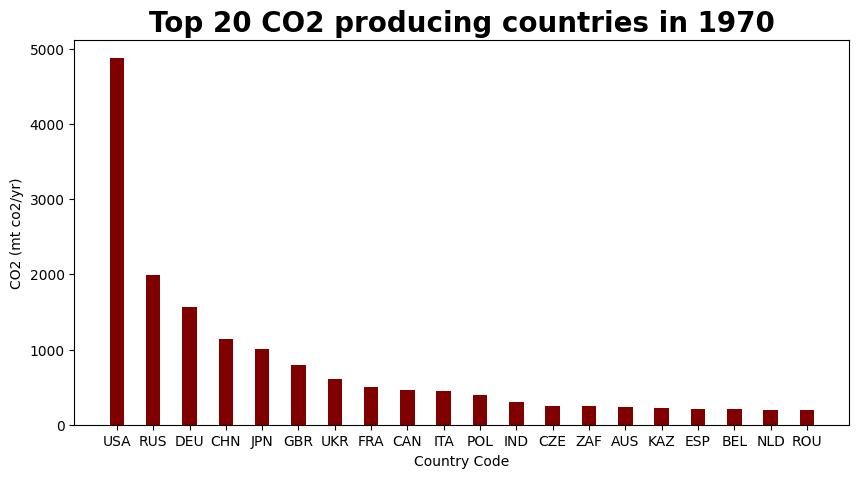

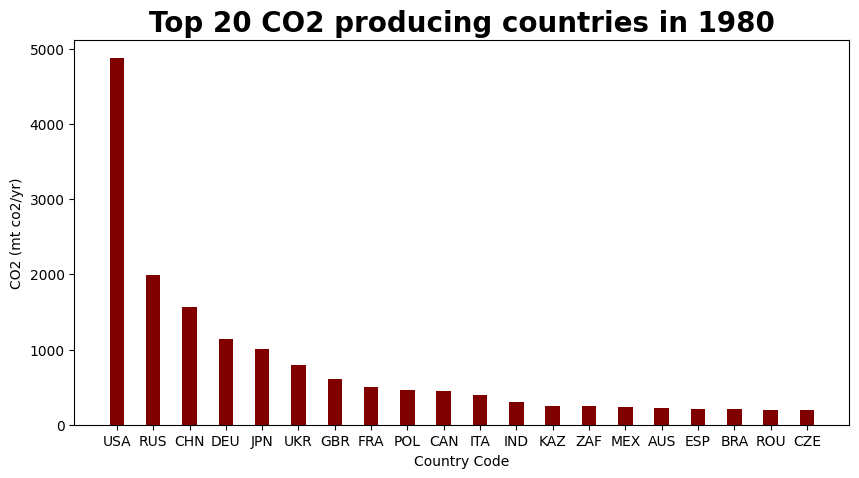

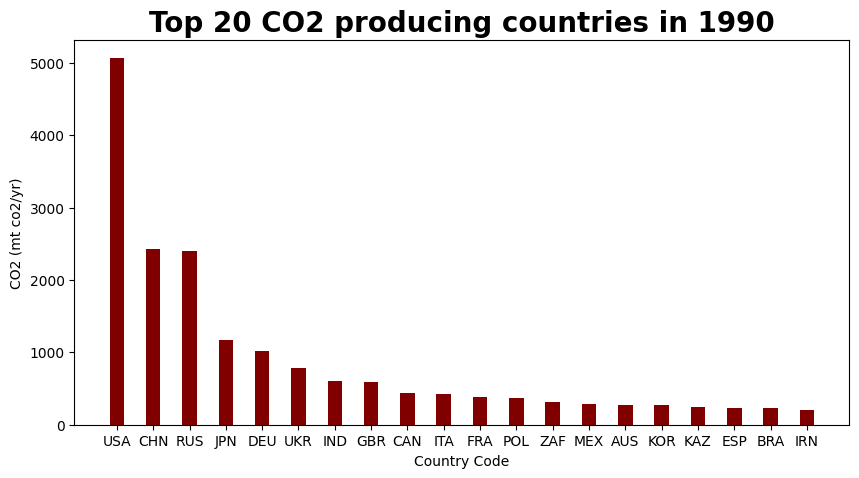

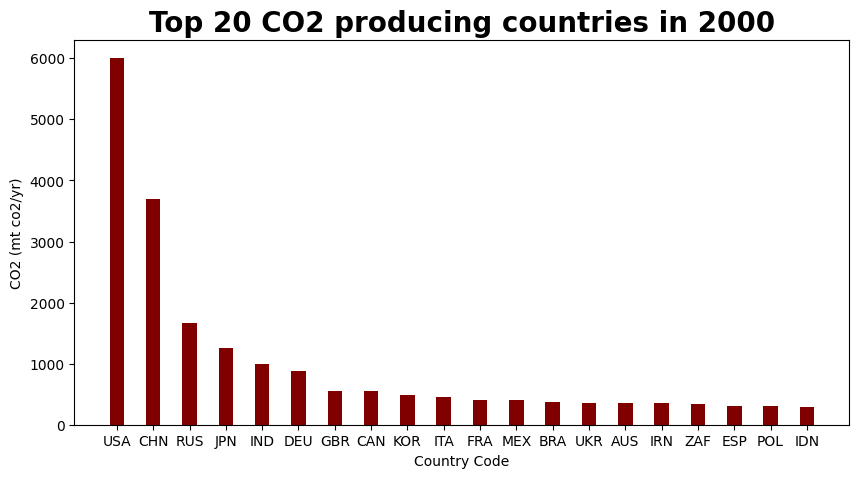

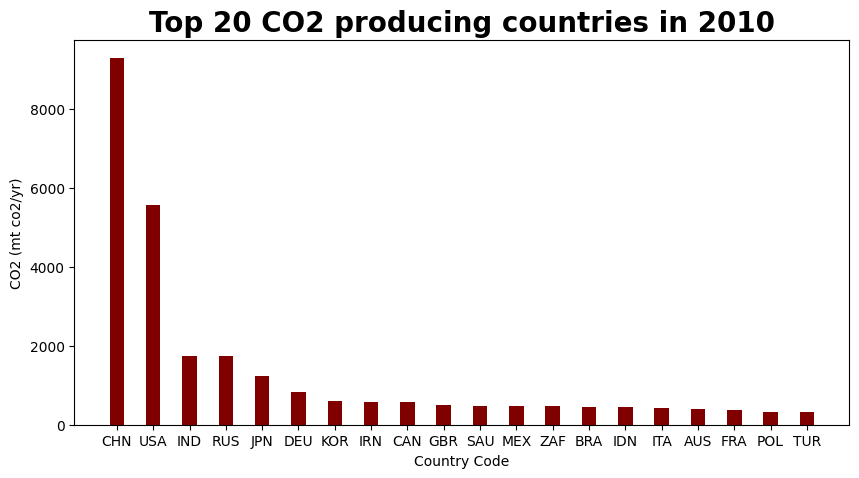

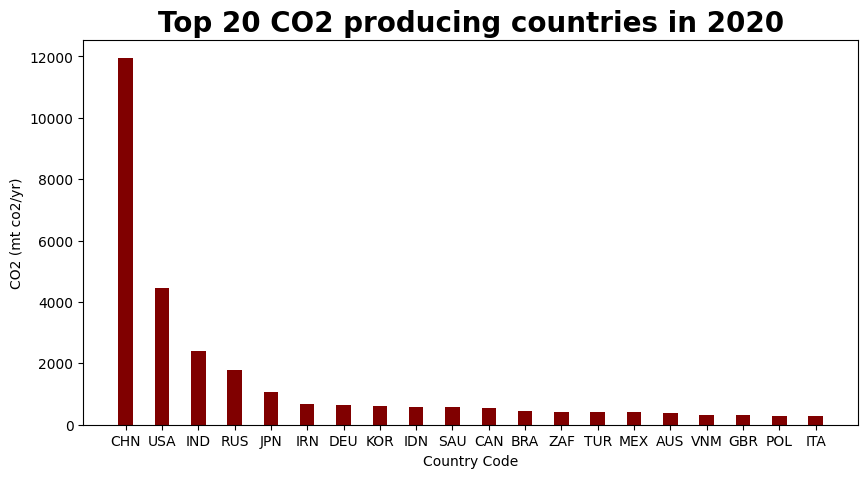

In [ ]:
plot_bar(country_top20_1970, val_2, "Country Code", "CO2 (mt co2/yr)", "Top 20 CO2 producing countries in 1970")
plot_bar(country_top20_1980, val_2, "Country Code", "CO2 (mt co2/yr)", "Top 20 CO2 producing countries in 1980")
plot_bar(country_top20_1990, val_3, "Country Code", "CO2 (mt co2/yr)", "Top 20 CO2 producing countries in 1990")
plot_bar(country_top20_2000, val_4, "Country Code", "CO2 (mt co2/yr)", "Top 20 CO2 producing countries in 2000")
plot_bar(country_top20_2010, val_5, "Country Code", "CO2 (mt co2/yr)", "Top 20 CO2 producing countries in 2010")
plot_bar(country_top20_2020, val_6, "Country Code", "CO2 (mt co2/yr)", "Top 20 CO2 producing countries in 2020")

In [ ]:
all_top_country=list(set(country_top20_1970)|(set(country_top20_1980)|set(country_top20_1990)|set(country_top20_2000)|set(country_top20_2010)|set(country_top20_2020)))
print("List of countries which are highest producer of CO2 in past 5 decades:",all_top_country)

List of countries which are highest producer of CO2 in past 5 decades: ['POL', 'CHN', 'JPN', 'NLD', 'VNM', 'MEX', 'CAN', 'ROU', 'BRA', 'BEL', 'KOR', 'FRA', 'UKR', 'IRN', 'TUR', 'ITA', 'IND', 'ESP', 'KAZ', 'ZAF', 'IDN', 'CZE', 'AUS', 'USA', 'GBR', 'DEU', 'SAU', 'RUS']


In [ ]:
dict_date_value={}
for i in all_top_country:
  dict_date_value[i]=[float(data_co2[data_co2["Code"]==i][1970]),float(data_co2[data_co2["Code"]==i][1980]),float(data_co2[data_co2["Code"]==i][1990]),float(data_co2[data_co2["Code"]==i][2000]),float(data_co2[data_co2["Code"]==i][2010]),float(data_co2[data_co2["Code"]==i][2020])]
df1 = pd.DataFrame(dict_date_value)
df1.insert(0, 'Year', [1970,1980,1990,2000,2010,2020])



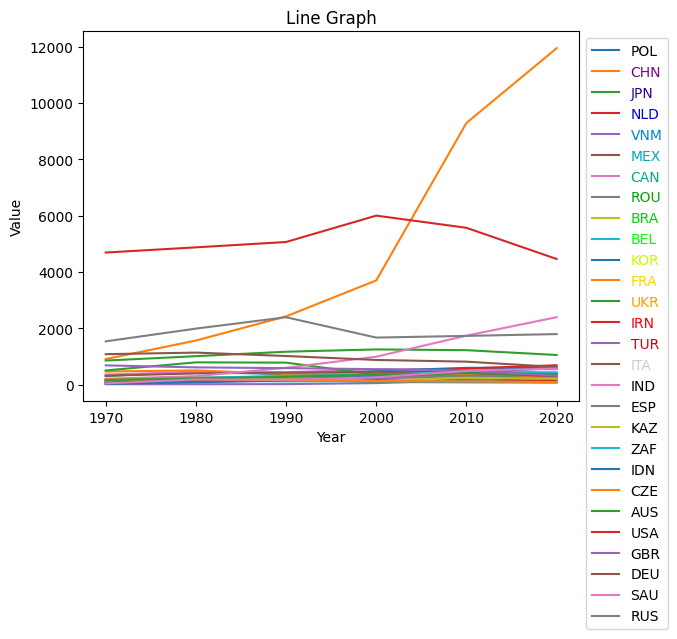

In [ ]:
colormap = plt.cm.nipy_spectral
colors = colormap(np.linspace(0, 1, 16))

ax = df1.plot(x='Year', y=all_top_country, kind='line')
ax.set_prop_cycle('color', colors)


# Customize the legend
legend = ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Set different colors for each legend
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#17becf','#F0F8FF', '#FAEBD7','#00FFFF','#7FFFD4','#F0FFFF',
      #F5F5DC']#,'blue', 'green',"pink", "yellow",'red', 'black', 'brown',,'#FFE4C4'
for text, color in zip(legend.texts, colors):
    text.set_color(color)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Line Graph')

plt.show()

## The top 5 countries that we can see are the largest produces of Co2 and thus the outliers of the datasets are: USA, CHINA, INDIA, JAPAN and RUSSIA.

In [ ]:
country_top_half_decade=list(set(country_top20_1970).intersection(set(country_top20_1980),set(country_top20_1990),set(country_top20_2000),set(country_top20_2010),set(country_top20_2020)))
print("Countries which are constantly producing highest CO2 in last 5 decades:",country_top_half_decade)

Countries which are constantly producing highest CO2 in last 5 decades: ['POL', 'AUS', 'USA', 'ITA', 'IND', 'CHN', 'JPN', 'GBR', 'RUS', 'ZAF', 'DEU', 'CAN']


### Least CO2  producers in the world since last 5 decades

In [ ]:
country_bottom10_1970, least_1=sort_df(data_co2, 1970,20,True)
country_bottom10_1980, least_2=sort_df(data_co2, 1980,20, True)
country_bottom10_1990, least_3=sort_df(data_co2, 1990,20, True)
country_bottom10_2000, least_4=sort_df(data_co2, 2000,20, True)
country_bottom10_2010,least_5=sort_df(data_co2, 2010,20, True)
country_bottom10_2020,least_6=sort_df(data_co2, 2020,20, True)

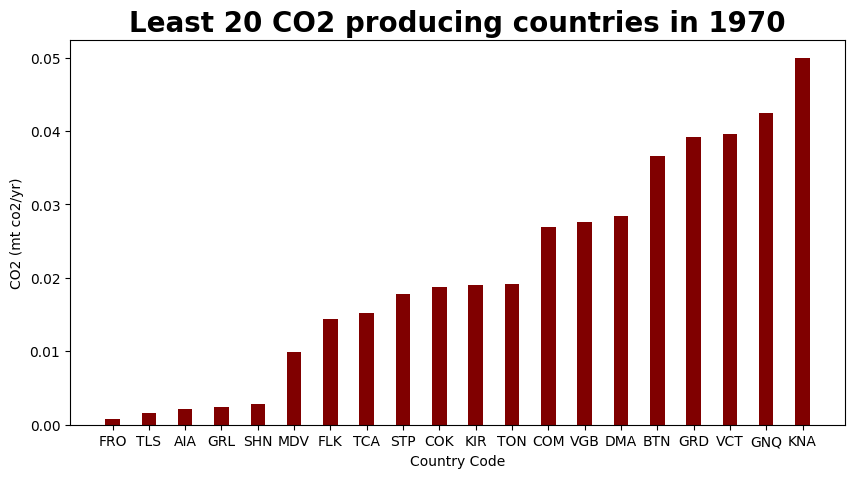

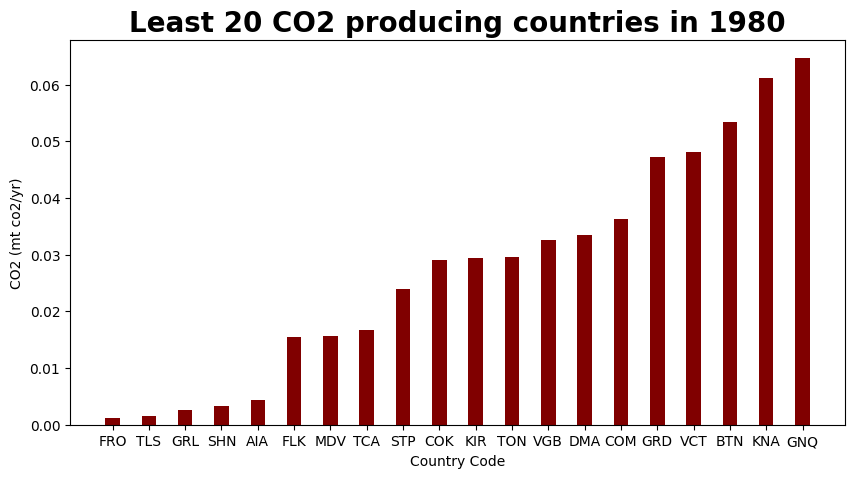

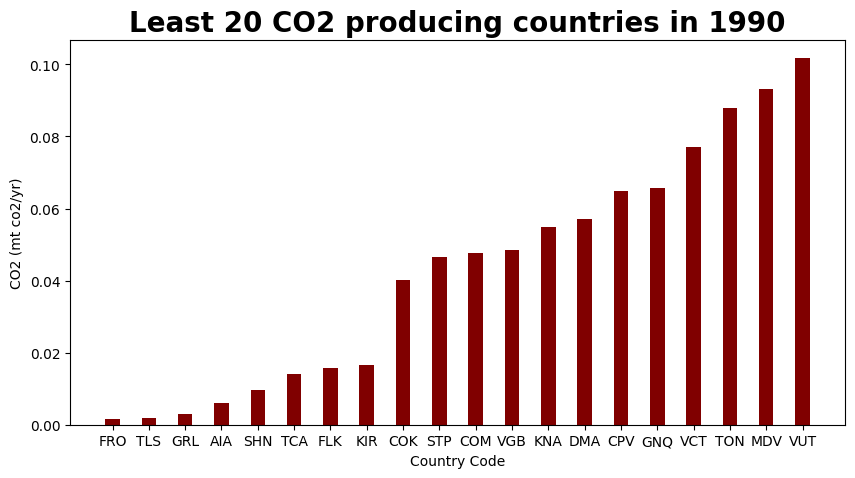

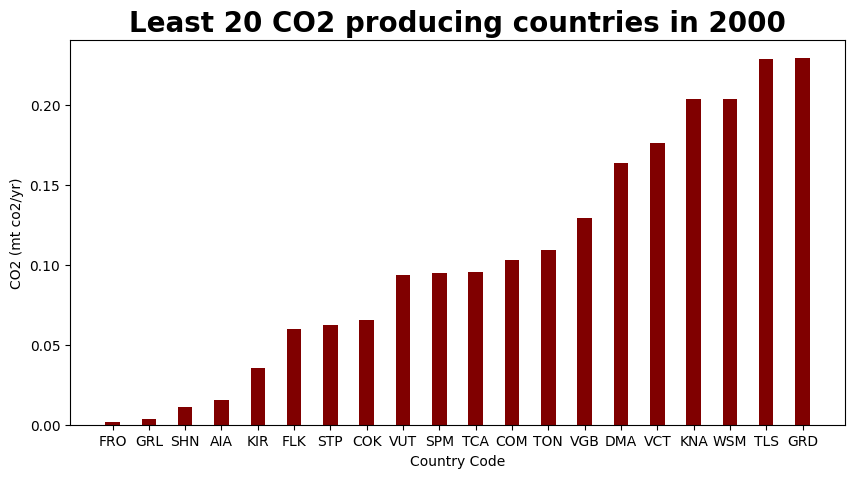

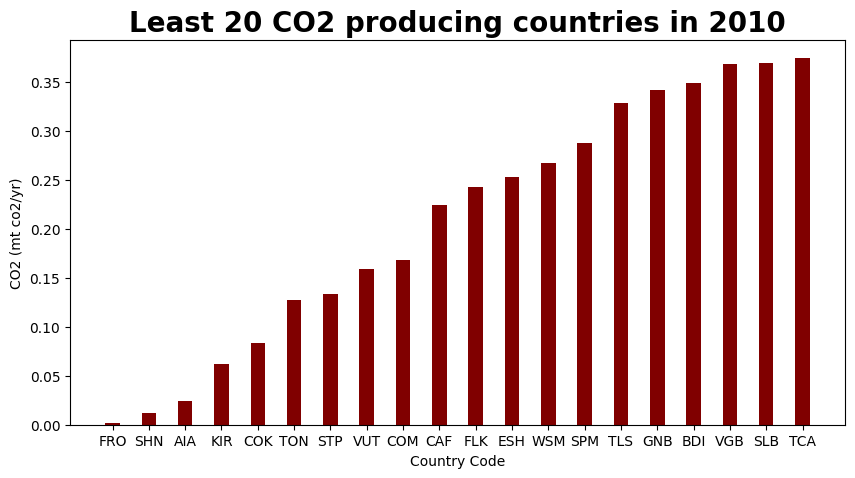

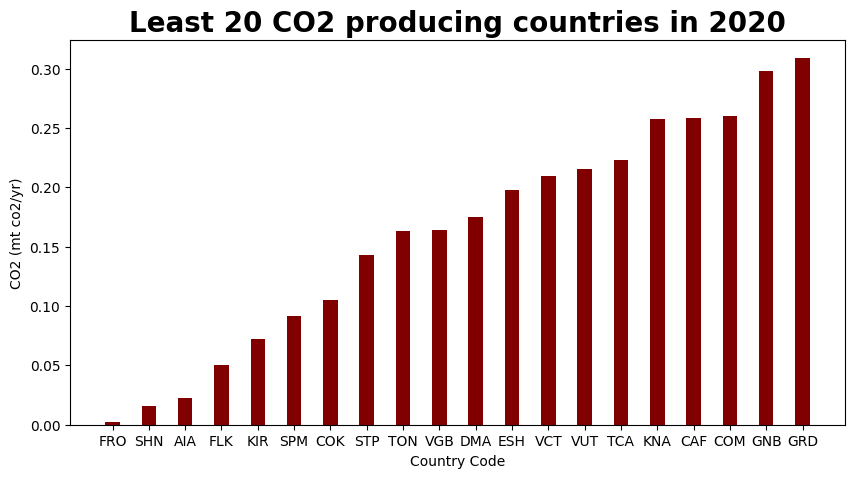

In [ ]:
plot_bar(country_bottom10_1970, least_1, "Country Code", "CO2 (mt co2/yr)", "Least 20 CO2 producing countries in 1970")
plot_bar(country_bottom10_1980, least_2, "Country Code", "CO2 (mt co2/yr)", "Least 20 CO2 producing countries in 1980")
plot_bar(country_bottom10_1990, least_3, "Country Code", "CO2 (mt co2/yr)", "Least 20 CO2 producing countries in 1990")
plot_bar(country_bottom10_2000, least_4, "Country Code", "CO2 (mt co2/yr)", "Least 20 CO2 producing countries in 2000")
plot_bar(country_bottom10_2010, least_5, "Country Code", "CO2 (mt co2/yr)", "Least 20 CO2 producing countries in 2010")
plot_bar(country_bottom10_2020, least_6, "Country Code", "CO2 (mt co2/yr)", "Least 20 CO2 producing countries in 2020")

In [ ]:
all_least_country=country_least_half_decade=set(country_bottom10_1970)|(set(country_bottom10_1980)|set(country_bottom10_1990)|set(country_bottom10_2000)|set(country_bottom10_2010)|set(country_bottom10_2020))
print("Least CO2 producer in last 5 decades:",all_least_country )

Least CO2 producer in last 5 decades: {'TCA', 'TON', 'ESH', 'KIR', 'MDV', 'BTN', 'GNB', 'BDI', 'CAF', 'COK', 'SPM', 'GRL', 'DMA', 'VUT', 'FLK', 'CPV', 'SLB', 'TLS', 'VCT', 'AIA', 'GNQ', 'SHN', 'KNA', 'FRO', 'VGB', 'COM', 'STP', 'WSM', 'GRD'}


In [ ]:
country_least_half_decade=set(country_bottom10_1970).intersection(set(country_bottom10_1980),set(country_bottom10_1990),set(country_bottom10_2000),set(country_bottom10_2010),set(country_bottom10_2020))

In [ ]:
print("Least CO2 producing countries for all 5 decades:",country_least_half_decade)

Least CO2 producing countries for all 5 decades: {'FRO', 'TON', 'VGB', 'COK', 'AIA', 'TCA', 'STP', 'COM', 'FLK', 'KIR', 'SHN'}


### Plot for CO2 producing for all the countries in the year 2020

1.   List item
2.   List item



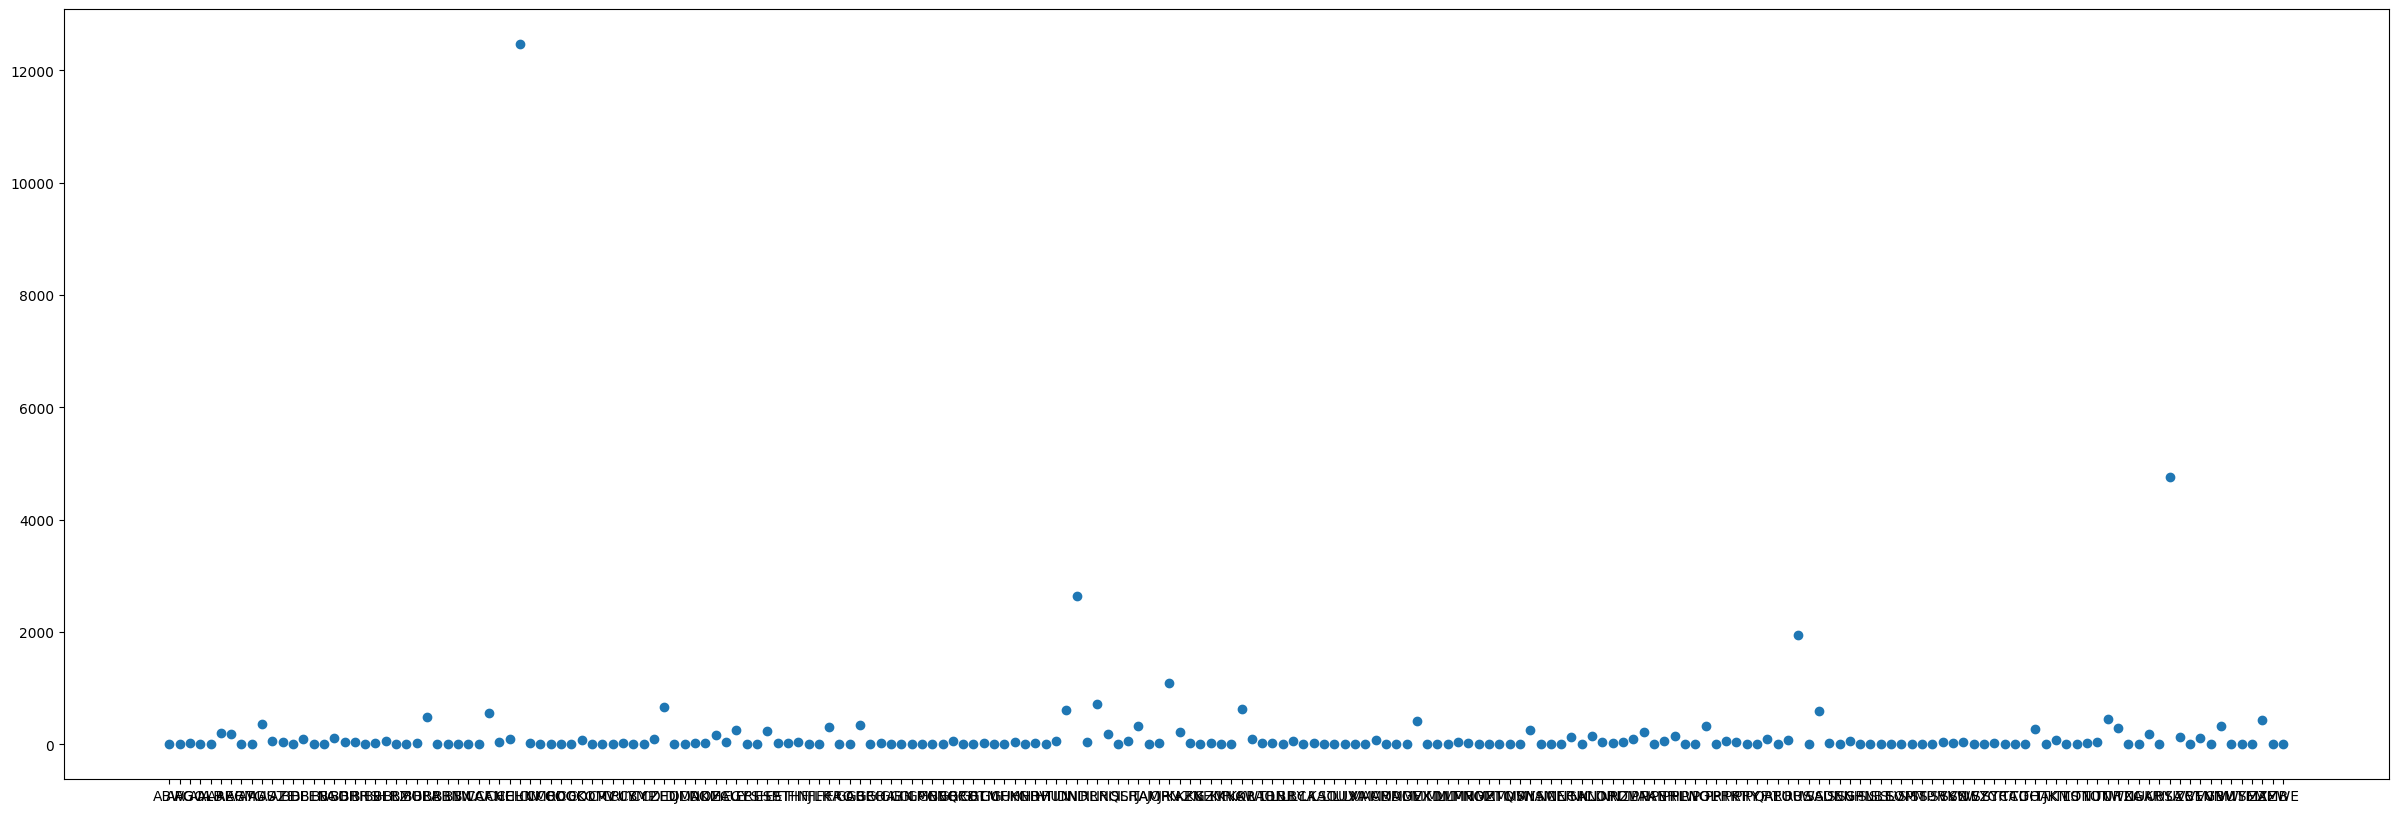

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (30,10))
plt.scatter(data_co2["Code"],data_co2[2021])

From above scatter chart we can see that the Co2 levels for most of the countries are the same and thus it is evident that most of the countries will fall in one bucket.

### Crop Dataset

In [ ]:
data_rice['Code'].unique()

array(['AFG', nan, 'ALB', 'DZA', 'AGO', 'ARG', 'ARM', 'AUS', 'AZE', 'BGD',
       'BEL', 'BLZ', 'BEN', 'BTN', 'BOL', 'BRA', 'BRN', 'BGR', 'BFA',
       'BDI', 'KHM', 'CMR', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM',
       'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'COD', 'DNK',
       'DOM', 'TLS', 'ECU', 'EGY', 'SLV', 'EST', 'SWZ', 'ETH', 'FJI',
       'FIN', 'FRA', 'GUF', 'GAB', 'GMB', 'DEU', 'GHA', 'GRC', 'GTM',
       'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'IND', 'IDN',
       'IRN', 'IRQ', 'IRL', 'ITA', 'JAM', 'JPN', 'KAZ', 'KEN', 'KGZ',
       'LAO', 'LVA', 'LBR', 'LTU', 'LUX', 'MDG', 'MWI', 'MYS', 'MLI',
       'MLT', 'MRT', 'MUS', 'OWID_MNS', 'MEX', 'FSM', 'MDA', 'MAR', 'MOZ',
       'MMR', 'NPL', 'NLD', 'NZL', 'NIC', 'NER', 'NGA', 'PRK', 'MKD',
       'PAK', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL', 'PRT', 'PRI',
       'REU', 'ROU', 'RUS', 'RWA', 'VCT', 'SAU', 'SEN', 'SLE', 'SVK',
       'SVN', 'SLB', 'SOM', 'ZAF', 'KOR', 'SSD', 'ESP', 'LKA', 'SDN',
       'SU

In [ ]:
data_rice.head()

,Entity,Code,Year,Rice | 00000027 || Production | 005510 || tonnes
0,Afghanistan,AFG,1961,319000.0
1,Afghanistan,AFG,1962,319000.0
2,Afghanistan,AFG,1963,319000.0
3,Afghanistan,AFG,1964,380000.0
4,Afghanistan,AFG,1965,380000.0


In [ ]:

data_maize.head()

,Entity,Code,Year,Maize | 00000056 || Production | 005510 || tonnes
0,Afghanistan,AFG,1961,700000.0
1,Afghanistan,AFG,1962,700000.0
2,Afghanistan,AFG,1963,713000.0
3,Afghanistan,AFG,1964,720000.0
4,Afghanistan,AFG,1965,720000.0


In [ ]:
data_soybean.head()

,Entity,Code,Year,Soybeans | 00000236 || Production | 005510 || tonnes
0,Africa,NaN,1961,71813.0
1,Africa,NaN,1962,84594.0
2,Africa,NaN,1963,87260.0
3,Africa,NaN,1964,76781.0
4,Africa,NaN,1965,73067.0


In [ ]:

data_wheat.head()

,Entity,Code,Year,Wheat | 00000015 || Production | 005510 || tonnes
0,Afghanistan,AFG,1961,2279000.0
1,Afghanistan,AFG,1962,2279000.0
2,Afghanistan,AFG,1963,1947000.0
3,Afghanistan,AFG,1964,2230000.0
4,Afghanistan,AFG,1965,2282000.0


In [ ]:
#Get data based on the years
def trimDataFrame(df,start,end):
  df_trimmed= (
      df
      .query(f'Year > {start} and Year < {end}')
  )

  return df_trimmed


def plotTimeGraph(df , xAttribute, yAttribute , xlabel, yLabel , linestyle= 'solid'):
  plt.plot(df[xAttribute], df[yAttribute], linestyle = linestyle)

  # Add title and axis labels
  plt.title('Time Series Plot '+yAttribute)
  plt.xlabel(xlabel)
  plt.ylabel(yLabel)
  plt.xticks(rotation=45)

  # Display the plot
  plt.show()


In [ ]:
df_wheat = data_wheat.rename(columns={'Wheat | 00000015 || Production | 005510 || tonnes': 'wheat_tonnes'})
#df_wheat['wheat_tonnes_change'] = df_wheat.groupby('Code')['wheat_tonnes'].diff()
#df_wheat['wheat_tonnes_change_percent'] = df_wheat.groupby('Code')['wheat_tonnes'].pct_change()*100
df_wheat = trimDataFrame(df_wheat , 1970 , 2021)
df_wheat = df_wheat[['Year', 'wheat_tonnes','Code']]

In [ ]:
df_rice = data_rice.rename(columns={'Rice | 00000027 || Production | 005510 || tonnes': 'rice_tonnes'})
#df_rice['rice_tonnes_change'] = df_rice.groupby('Code')['rice_tonnes'].diff()
#df_rice['rice_tonnes_change_percent'] = df_rice.groupby('Code')['rice_tonnes'].pct_change()*100
df_rice = trimDataFrame(df_rice , 1970 , 2021)
df_rice = df_rice[['Year', 'rice_tonnes','Code']]


In [ ]:
df_maize = data_maize.rename(columns={'Maize | 00000056 || Production | 005510 || tonnes': 'maize_tonnes'})
#df_maize['maize_tonnes_change'] = df_maize.groupby('Code')['maize_tonnes'].diff()
#df_maize['maize_tonnes_change_percent'] = df_maize.groupby('Code')['maize_tonnes'].pct_change()*100
df_maize = trimDataFrame(df_maize , 1970 , 2021)
df_maize = df_maize[['Year', 'maize_tonnes','Code']]

In [ ]:
df_soybean = data_soybean.rename(columns={'Soybeans | 00000236 || Production | 005510 || tonnes': 'soybean_tonnes'})
#df_soybean['soybean_tonnes_change'] = df_soybean.groupby('Code')['soybean_tonnes'].diff()
#df_soybean['soybean_tonnes_change_percent'] = df_soybean.groupby('Code')['soybean_tonnes'].pct_change()*100
df_soybean = trimDataFrame(df_soybean , 1970 , 2021)
df_soybean = df_soybean[['Year', 'soybean_tonnes','Code']]


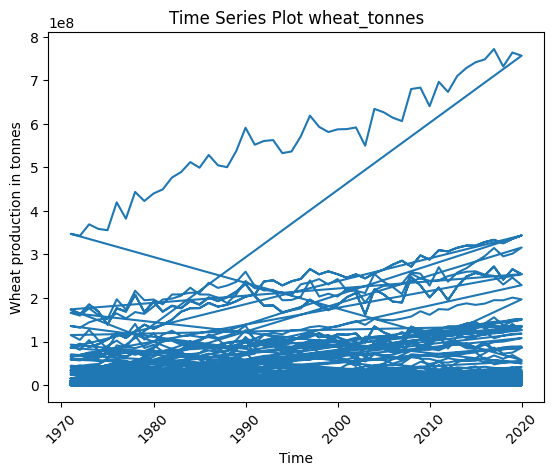

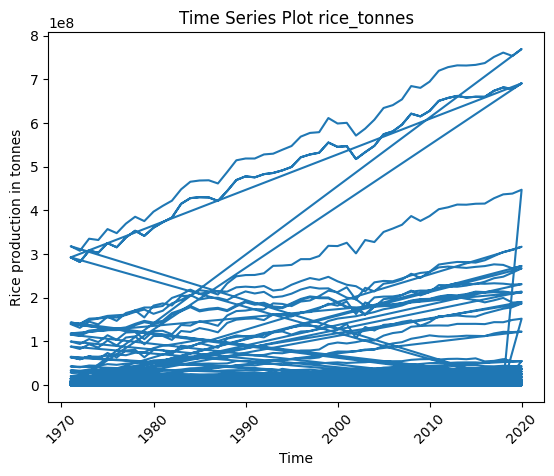

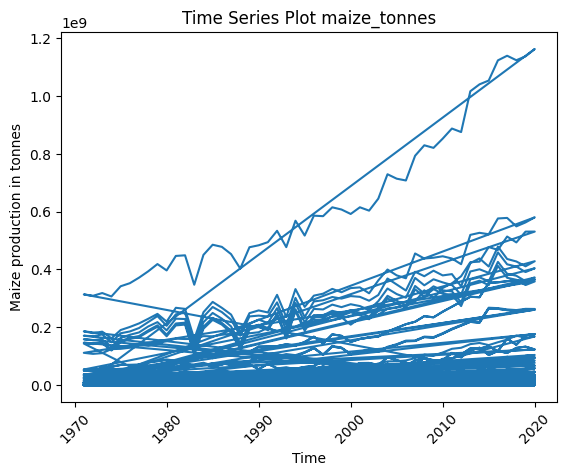

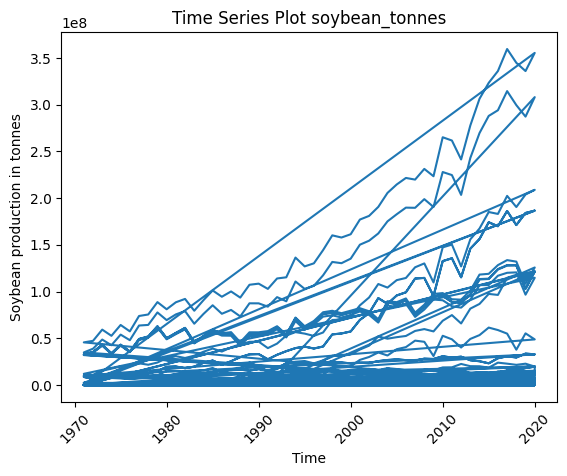

In [ ]:
plotTimeGraph(df_wheat , 'Year' , 'wheat_tonnes', 'Time' , 'Wheat production in tonnes')
plotTimeGraph(df_rice , 'Year' , 'rice_tonnes', 'Time' , 'Rice production in tonnes')
plotTimeGraph(df_maize , 'Year' , 'maize_tonnes', 'Time' , 'Maize production in tonnes')
plotTimeGraph(df_soybean , 'Year' , 'soybean_tonnes', 'Time' , 'Soybean production in tonnes')

In [ ]:
data_co2_country.head()

,Substance,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CO2,ABW,Aruba,0.081876,0.081889,0.095415,0.099630,0.089089,0.105139,0.096041,...,1.618441,1.588689,1.615728,1.607879,1.578644,1.315458,1.347594,1.387156,1.144333,1.274134
1,CO2,AFG,Afghanistan,1.739541,1.737823,1.715749,1.742813,2.198551,2.037627,1.899895,...,10.238064,8.484183,8.016290,8.361849,7.635914,8.145255,9.106997,8.082724,8.183718,8.347669
2,CO2,AGO,Angola,8.952570,8.538308,10.388519,11.372301,11.833761,10.930423,7.317385,...,24.186843,27.822325,30.407844,32.594130,30.691660,26.129882,24.048619,25.325994,23.055844,24.450057
3,CO2,AIA,Anguilla,0.002168,0.002168,0.002264,0.002109,0.002350,0.002584,0.002434,...,0.026023,0.027941,0.027896,0.028005,0.028340,0.029062,0.028223,0.027580,0.022779,0.025409
4,CO2,AIR,International Aviation,169.300997,169.300997,179.147487,186.892096,179.793331,173.866020,174.273791,...,472.721119,480.909126,496.627697,524.654035,548.207777,582.230490,609.630469,617.763229,338.144083,390.166250


In [ ]:
data_co2=data_co2.drop("Country", axis=1)
data_co2=data_co2.drop("Substance", axis=1)
data_co2=data_co2.drop("change_co2", axis=1)

In [ ]:
data_co2

,Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,ABW,0.081876,0.081889,0.095415,0.099630,0.089089,0.105139,0.096041,0.105305,0.106662,...,1.618441,1.588689,1.615728,1.607879,1.578644,1.315458,1.347594,1.387156,1.144333,1.274134
1,AFG,1.739541,1.737823,1.715749,1.742813,2.198551,2.037627,1.899895,2.288853,1.940763,...,10.238064,8.484183,8.016290,8.361849,7.635914,8.145255,9.106997,8.082724,8.183718,8.347669
2,AGO,8.952570,8.538308,10.388519,11.372301,11.833761,10.930423,7.317385,12.057774,14.239234,...,24.186843,27.822325,30.407844,32.594130,30.691660,26.129882,24.048619,25.325994,23.055844,24.450057
3,AIA,0.002168,0.002168,0.002264,0.002109,0.002350,0.002584,0.002434,0.002537,0.002902,...,0.026023,0.027941,0.027896,0.028005,0.028340,0.029062,0.028223,0.027580,0.022779,0.025409
5,ALB,4.814516,4.814828,5.498804,4.939869,5.319746,5.414438,5.785733,6.197670,6.820001,...,4.574328,4.811345,5.134697,4.916119,4.619508,5.346925,5.314989,5.038618,4.706920,4.591114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,WSM,0.066463,0.066477,0.070846,0.085103,0.104300,0.086264,0.085005,0.089722,0.089041,...,0.274988,0.269788,0.270614,0.310972,0.323645,0.318352,0.309437,0.345618,0.347398,0.360230
206,YEM,1.628338,1.641465,1.925847,2.343192,2.331963,2.233986,2.732128,2.777738,3.048519,...,21.987575,28.766690,28.338664,14.247711,11.118668,10.695935,10.417670,12.307957,11.607959,12.047245
207,ZAF,185.640021,184.557782,191.212162,208.378907,215.229511,231.208302,245.600945,245.350447,223.326864,...,459.783780,471.432912,482.539654,458.824044,458.689488,468.790178,467.184261,470.522116,427.815947,435.522812
208,ZMB,3.670158,3.827327,4.235602,4.549516,4.584571,4.756705,4.757159,4.305699,4.106261,...,4.353041,4.560796,4.995499,5.314527,5.783061,7.265927,8.268376,7.084711,6.618359,7.010965


In [ ]:
df_co2_ = pd.melt(data_co2, id_vars=['Code'] , var_name='Year', value_name ='CO2')

In [ ]:
df_co2_[df_co2_['Code'] =='ABW']

,Code,Year,CO2
0,ABW,1970,0.081876
206,ABW,1971,0.081889
412,ABW,1972,0.095415
618,ABW,1973,0.099630
824,ABW,1974,0.089089
1030,ABW,1975,0.105139
1236,ABW,1976,0.096041
1442,ABW,1977,0.105305
1648,ABW,1978,0.106662
1854,ABW,1979,0.100830


## Q2: To find if the production of rice is increasing as the CO2 is increasing.

In [ ]:
# Merging co2 and rice dataset by year and country code
df_co2_rice_ = pd.merge(df_rice, df_co2_, on=['Year','Code'])


In [ ]:
df_co2_rice_ = df_co2_rice_[~(df_co2_rice_['rice_tonnes'] ==0)]

In [ ]:
df_co2_rice_

,Year,rice_tonnes,Code,CO2
0,1971,350000.00,AFG,1.737823
1,1972,400000.00,AFG,1.715749
2,1973,420000.00,AFG,1.742813
3,1974,420000.00,AFG,2.198551
4,1975,435000.00,AFG,2.037627
...,...,...,...,...
5898,2016,1295.99,ZWE,11.312592
5899,2017,1326.90,ZWE,10.540316
5900,2018,1342.47,ZWE,12.730372
5901,2019,1134.00,ZWE,12.088218


In [ ]:
df_co2_rice_['change_in_rice'] = df_co2_rice_.groupby('Code')['rice_tonnes'].pct_change()*100
df_co2_rice_['change_in_C02'] = df_co2_rice_.groupby('Code')['CO2'].pct_change()*100

In [ ]:
# calculating average change in rice production and average change in CO2 over the years(1971-2020)
agg_gains_df = (
    df_co2_rice_
    .groupby("Code")
    .agg({"change_in_rice": "mean", "change_in_C02": "mean"})
    .reset_index()
    .rename(columns={"change_in_rice": "avg_change_in_rice","change_in_C02": "avg_change_in_C02"})
)


In [ ]:
agg_gains_df

,Code,avg_change_in_rice,avg_change_in_C02
0,AFG,1.377266,5.281433
1,AGO,9.416089,2.868753
2,ALB,-8.776611,-2.068376
3,ARG,5.855274,1.459754
4,AUS,18.736804,1.762916
...,...,...,...
117,VEN,6.210020,1.380223
118,VNM,3.065129,6.586601
119,ZAF,1.280524,1.811582
120,ZMB,16.823286,1.685110


In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn import metrics

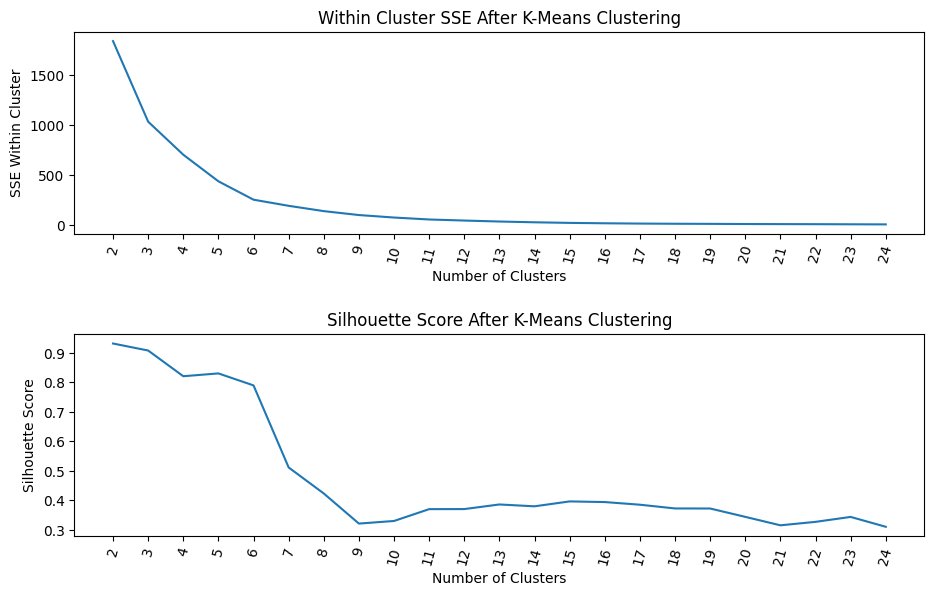

In [ ]:

def plot_cluster(df, max_loop=50):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]

    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)

    sse_within_cluster = {}
    silhouette_score = {}

    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)
plot_cluster(agg_gains_df, max_loop=25)


In [ ]:
def fractal_distance(x1, y1, x2, y2, num_divisions):
  print(x1,y1,x2,y2)
  """
  Calculates the fractal distance between two points in a 2D space using the
  box-counting method.
  """
  # Create a grid with num_divisions x num_divisions boxes
  x = np.linspace(min(x1, x2), max(x1, x2), num_divisions + 1)
  y = np.linspace(min(y1, y2), max(y1, y2), num_divisions + 1)
  grid = np.zeros((num_divisions, num_divisions))
  # Place a point at each of the two endpoints
  x1_idx = np.argmin(np.abs(x - x1))
  y1_idx = np.argmin(np.abs(y - y1))
  grid[y1_idx, x1_idx] = 1
  x2_idx = np.argmin(np.abs(x - x2))
  y2_idx = np.argmin(np.abs(y - y2))
  grid[y2_idx, x2_idx] = 1
  # Count the number of boxes that contain at least one point
  num_boxes_with_points = 0
  for i in range(num_divisions):
    for j in range(num_divisions):
      if np.sum(grid[i:i+2, j:j+2]) > 0:
        num_boxes_with_points += 1
  # Calculate the fractal dimension and use it to estimate the length of the path
  fractal_dim = np.log(num_boxes_with_points) / np.log(2)
  fractal_length = (2 ** fractal_dim) * ((x2 - x1) ** 2 + (y2 - y1) ** 2) **0.5
  return fractal_length


In [ ]:
# Custom KMeans subclass
from sklearn.cluster import KMeans
class CustomKMeans(KMeans):
    def __init__(self, n_clusters=8, init='k-means++', max_iter=300):
        super().__init__(n_clusters=n_clusters, init=init, max_iter=max_iter)

    def _transform(self, X):
        print(X)
        return fractal_distance(X, self.cluster_centers_)






In [ ]:
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = CustomKMeans(clusters)
    kmeans.fit(X_rb)
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_

    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(round(score,2)))
    print("sse withing cluster: " + str(round(sse_within_cluster)))

    return df

In [ ]:
first_trial = apply_cluster(agg_gains_df, clusters=6)

clustering performance
-----------------------------------
silhouette score: 0.79
sse withing cluster: 257


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
first_trial

In [ ]:
cluster_perf_df = (
    first_trial
    .groupby('cluster')
    .agg({"avg_change_in_rice"	:"mean", "avg_change_in_C02":"mean", "Code":"count"})
    .sort_values('avg_change_in_rice')
    .reset_index()
)

cluster_perf_df

,cluster,avg_change_in_rice,avg_change_in_C02,Code
0,0,5.326904,3.878128,112
1,4,5.442867,68.780580,1
2,2,61.944611,2.515493,5
3,5,212.931097,19.265958,2
4,1,340.294749,8.670661,1
5,3,468.796143,8.549534,1


In [ ]:

cluster_selected1=int(cluster_perf_df[cluster_perf_df["Code"]==cluster_perf_df["Code"].max()]["cluster"])

In [ ]:
agg_df1_sub = agg_gains_df.query(f"cluster =={cluster_selected1}").reset_index(drop=True)

In [ ]:
agg_df1_sub

,Code,avg_change_in_rice,avg_change_in_C02,cluster
0,AFG,1.377266,5.281433,0
1,AGO,9.416089,2.868753,0
2,ALB,-8.776611,-2.068376,0
3,ARG,5.855274,1.459754,0
4,AUS,18.736804,1.762916,0
...,...,...,...,...
107,VEN,6.210020,1.380223,0
108,VNM,3.065129,6.586601,0
109,ZAF,1.280524,1.811582,0
110,ZMB,16.823286,1.685110,0


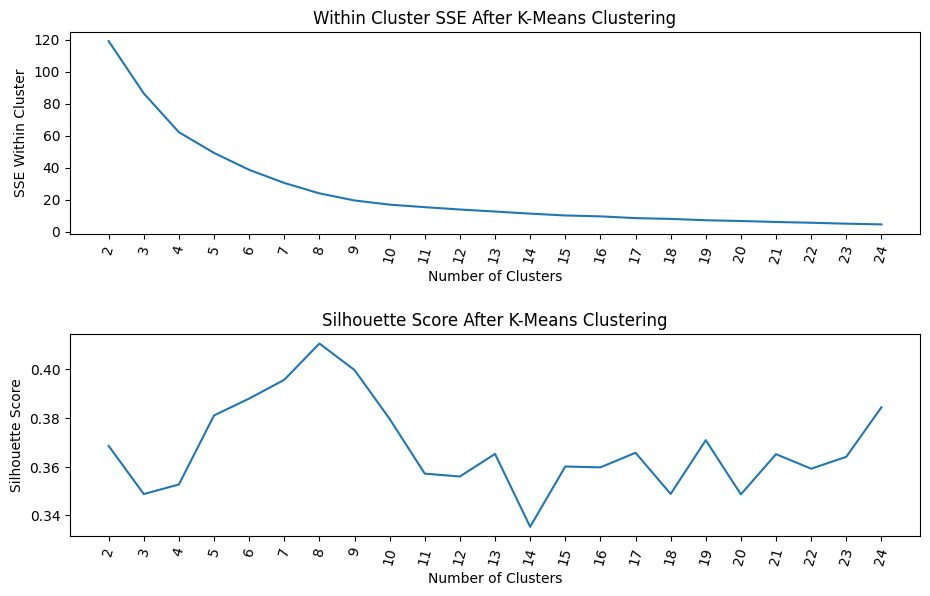

In [ ]:
plot_cluster(agg_df1_sub, max_loop=25)

In [ ]:
second_trial = apply_cluster(agg_df1_sub, clusters=4)

clustering performance
-----------------------------------
silhouette score: 0.35
sse withing cluster: 62


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_perf_df2 = (
    second_trial
    .groupby('cluster')
    .agg({"avg_change_in_rice"	:"mean", "avg_change_in_C02":"mean", "Code":"count"})
    .sort_values('avg_change_in_rice')
    .reset_index()
)

cluster_perf_df2

,cluster,avg_change_in_rice,avg_change_in_C02,Code
0,2,-11.309524,23.401564,1
1,3,2.798067,0.979417,36
2,1,3.198948,5.456806,46
3,0,12.415197,4.299196,29


In [ ]:
# gc=int(cluster_perf_df2[cluster_perf_df2 ["cluster"]== 1])
# agg_df2_sub = agg_df1_sub.query(f"cluster =={gc}").reset_index(drop=True)
# code_gc=list(agg_df2_sub["Code"])
# print("***Golden Cluster***")
# print("Cluster",agg_df2_sub["cluster"][0],":",code_gc)

In [ ]:
# print("Common countries in the golden cluster (rice vs CO2)and top 20 highest CO2 producers :")
# fit_country=list(set(all_top_country).intersection(set(code_gc)))
# for i in fit_country:
#   print(str(data_country_code[data_country_code["Code"]==i]["Country"]).split("\n")[0].split("   ")[-1])


Conclusion: Cluster with 29 countries seems to be better cluster as the average production over the year the production of rice has increased by almost 3 times. Now further it will be interesting to see what other factors are playing and can we predict the rice production based on CO2?

## Q3: To find if the production of wheat is increasing as the CO2 is increasing.

In [ ]:
df_wheat_ = df_wheat [['Year', 'wheat_tonnes','Code']]
df_wheat_

,Year,wheat_tonnes,Code
10,1971,1915000.0,AFG
11,1972,2450000.0,AFG
12,1973,2700000.0,AFG
13,1974,2750000.0,AFG
14,1975,2850000.0,AFG
...,...,...,...
9281,2016,42008.0,ZWE
9282,2017,38715.0,ZWE
9283,2018,45000.0,ZWE
9284,2019,94685.0,ZWE


In [ ]:
df_wheat_.isna().sum()

Year               0
wheat_tonnes       0
Code            2049
dtype: int64

In [ ]:
df_wheat_=removeDataWithoutCode(df_wheat_,"Code")



In [ ]:
df_co2_wheat_ = pd.merge(df_wheat, df_co2_, on=['Year','Code'])

In [ ]:
df_co2_wheat_ = df_co2_wheat_[~(df_co2_wheat_['wheat_tonnes'] ==0)]

In [ ]:
df_co2_wheat_
#.melt(df_co2, id_vars=['Code'], value_vars=['2002'])

,Year,wheat_tonnes,Code,CO2
0,1971,1915000.0,AFG,1.737823
1,1972,2450000.0,AFG,1.715749
2,1973,2700000.0,AFG,1.742813
3,1974,2750000.0,AFG,2.198551
4,1975,2850000.0,AFG,2.037627
...,...,...,...,...
5450,2016,42008.0,ZWE,11.312592
5451,2017,38715.0,ZWE,10.540316
5452,2018,45000.0,ZWE,12.730372
5453,2019,94685.0,ZWE,12.088218


In [ ]:
df_co2_wheat_['change_in_wheat'] = df_co2_wheat_.groupby('Code')['wheat_tonnes'].pct_change()*100
df_co2_wheat_['change_in_C02'] = df_co2_wheat_.groupby('Code')['CO2'].pct_change()*100


In [ ]:
df_co2_wheat_.isna().sum()

Year                 0
wheat_tonnes         0
Code                 0
CO2                  0
change_in_wheat    122
change_in_C02      122
dtype: int64

In [ ]:
df_co2_wheat_ = df_co2_wheat_.dropna()

In [ ]:
# calculating average change in rice production and average change in CO2 over the years(1971-2020)
agg_gains_df_wheat = (
    df_co2_wheat_
    .groupby("Code")
    .agg({"change_in_wheat": "mean", "change_in_C02": "mean"})
    .reset_index()
    .rename(columns={"change_in_wheat": "avg_change_in_wheat","change_in_C02": "avg_change_in_C02"})
)


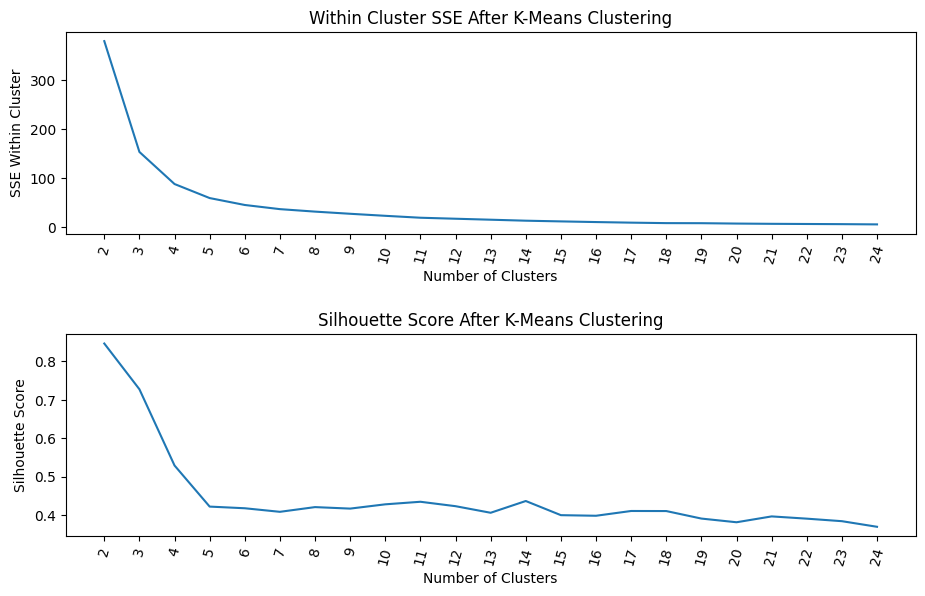

In [ ]:
plot_cluster(agg_gains_df_wheat, max_loop=25)

In [ ]:
first_trial_wheat = apply_cluster(agg_gains_df_wheat, clusters=7)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


clustering performance
-----------------------------------
silhouette score: 0.42
sse withing cluster: 36


In [ ]:
cluster_perf_df_w1 = (
    first_trial_wheat
    .groupby('cluster')
    .agg({"avg_change_in_wheat"	:"mean", "avg_change_in_C02":"mean", "Code":"count"})
    .sort_values('avg_change_in_wheat')
    .reset_index()
)

cluster_perf_df_w1

,cluster,avg_change_in_wheat,avg_change_in_C02,Code
0,4,2.537378,0.220469,43
1,6,5.653122,5.279893,30
2,0,10.248233,0.844387,23
3,5,16.336179,5.023526,14
4,3,31.968189,5.250767,7
5,2,70.807904,4.449880,4
6,1,206.199067,3.425809,1


In [ ]:
cluster_perf_df_w1[cluster_perf_df_w1["Code"]==cluster_perf_df_w1["Code"].max()]["cluster"]

0    4
Name: cluster, dtype: int64

In [ ]:
cluster_selected_w=int(cluster_perf_df_w1[cluster_perf_df_w1["Code"]==cluster_perf_df_w1["Code"].max()]["cluster"])

In [ ]:
agg_gains_df_wheat_sub1 = agg_gains_df_wheat.query(f"cluster == {cluster_selected_w}").reset_index(drop=True)

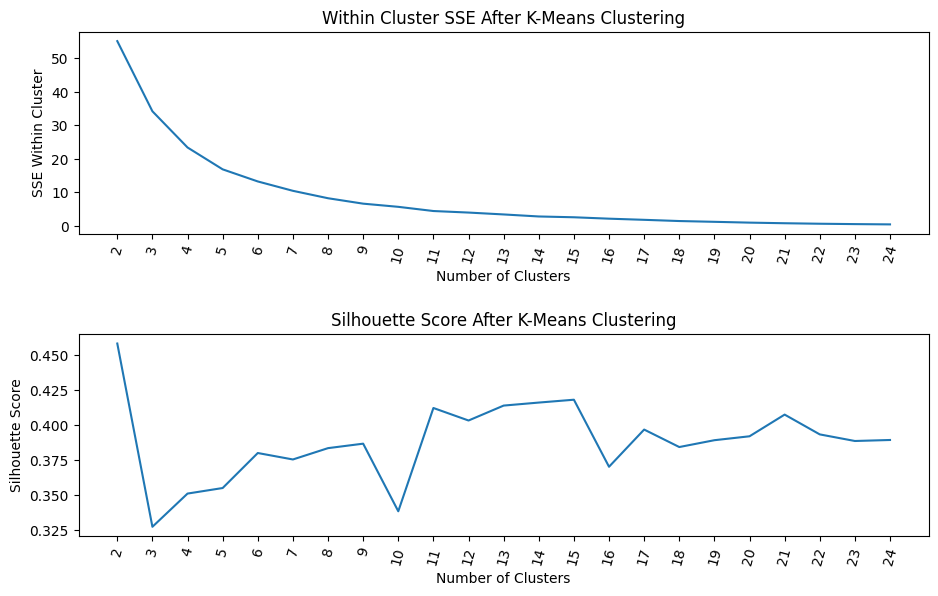

In [ ]:
plot_cluster(agg_gains_df_wheat_sub1, max_loop=25)

In [ ]:
second_trial_wheat = apply_cluster(agg_gains_df_wheat_sub1, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.34
sse withing cluster: 34


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_perf_df_w2 = (
    second_trial_wheat
    .groupby('cluster')
    .agg({"avg_change_in_wheat"	:"mean", "avg_change_in_C02":"mean", "Code":"count"})
    .sort_values('avg_change_in_wheat')
    .reset_index()
)

cluster_perf_df_w2

,cluster,avg_change_in_wheat,avg_change_in_C02,Code
0,2,-8.394485,4.432207,1
1,1,1.692019,0.643590,26
2,0,4.594328,-0.730336,16


These cluster keeps on changing

## Conclusion:

### 1: From the above graph we can see that the trend of global CO2 is upward with some seasoning. After every 5 years it seems to decrease a little but in a decade it goes upward. From 1970 to 2021, the global CO2 has increase more than twice what it was in 1970.

### 2: Cluster with 29 countries seems to be better cluster as the average production over the year the production of rice has increased by almost 3 times. Now further it will be interesting to see what other factors are playing and can we predict the rice production based on CO2?

### 3: cluster 2 seems best choice as wheat product for these countries are increasing approximately 3 times to CO2 production , this might be due to the use of fertilizers and pesticides. Which might also be able to contributes in Co2 levels

### Future work:
- Same clustering will be done for Soyabean and Maize.
- We will be doing timeseries for predicting CO2 levels and then use regression to predict the production of rice, wheat, soyabean and maize based on Co2 predicted.